In [1]:
import numpy as np
import scipy.stats as stats
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
# Define the function to integrate
def f(x):
    return (np.cos(50 * x) + np.sin(20 * x))**2

# Monte Carlo integration
def monte_carlo_integration(f, a, b, num_samples=10000):
    # Generate random sample points between a and b
    x_samples = np.random.uniform(a, b, num_samples)
    
    # Evaluate the function at the sample points
    f_values = f(x_samples)
    
    # Estimate the integral (mean of the function values scaled by the interval width)
    integral_estimate = (b - a) * np.mean(f_values)
    
    # Standard deviation of the function values
    stddev = np.std(f_values, ddof=1)
    
    return integral_estimate, stddev



In [3]:
# Integration bounds
a, b = 0, 1
num_samples = 100
confidence_level = 0.95

# Perform Monte Carlo integration
integral_estimate, standard_dev = monte_carlo_integration(f, a, b, num_samples)

z = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence interval
lower_bound = integral_estimate - z * standard_dev / np.sqrt(num_samples)
upper_bound = integral_estimate + z * standard_dev / np.sqrt(num_samples)

# Display the results
print(f"Estimated integral: {integral_estimate:.2f}")
print(f"95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})")
actual_width = upper_bound - lower_bound
print(f"actual_width: {actual_width:.2f}")

Estimated integral: 0.90
95% confidence interval: (0.69, 1.11)
actual_width: 0.42


In [4]:
# What if I want a given width:
width = 0.20
# compute number of samples
new_num_samples =  int((standard_dev * 2 * z/ width)**2)
# CHECK!

print(f"new_num_samples: {new_num_samples}")
# check the width:
integral_estimate, standard_dev = monte_carlo_integration(f, a, b, new_num_samples)
lower_bound = integral_estimate - z * standard_dev / np.sqrt(new_num_samples)
upper_bound = integral_estimate + z * standard_dev / np.sqrt(new_num_samples)
print(f"Estimated integral: {integral_estimate:.2f}")
print(f"95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})")
actual_width = upper_bound - lower_bound
print(f"actual_width: {actual_width:.2f}")

new_num_samples: 439
Estimated integral: 0.90
95% confidence interval: (0.81, 1.00)
actual_width: 0.19


In [5]:
# Compute value by numerical integration
integral, error = quad(f, a, b)
print(f"Real value: {integral:.2f} pm {error:.2f}")

# Run different times the MC simulation
n_reps = 10000
confidence_level = 0.95
z = stats.norm.ppf((1 + confidence_level) / 2)

num_samples = 100

count_ok = 0
count_ko = 0
for i in range(n_reps):
    integral_estimate, standard_dev = monte_carlo_integration(f, a, b, num_samples)
    lower_bound = integral_estimate - z * standard_dev / np.sqrt(num_samples)
    upper_bound = integral_estimate + z * standard_dev / np.sqrt(num_samples)
    if (lower_bound <= integral) and (integral <= upper_bound):
        count_ok +=1
    else:
        count_ko +=1

print(f"count_ok: {count_ok / n_reps} - count_ko: {count_ko/ n_reps}")

Real value: 0.97 pm 0.00
count_ok: 0.9461 - count_ko: 0.0539


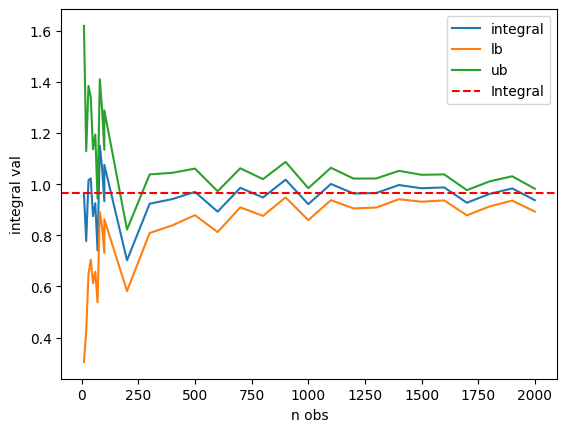

In [6]:
# Evolution respect to n
a, b = 0, 1
confidence_level = 0.95
lst_n_samples = list(range(10,110, 10)) + list(range(100,2100, 100))
integral_estimate_vals = np.zeros(len(lst_n_samples))
lower_bound_vals = np.zeros(len(lst_n_samples))
upper_bound_vals = np.zeros(len(lst_n_samples))

for i, num_samples in enumerate(lst_n_samples):
    # Perform Monte Carlo integration
    integral_estimate, standard_dev = monte_carlo_integration(f, a, b, num_samples)
    
    z = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence interval
    lower_bound = integral_estimate - z * standard_dev / np.sqrt(num_samples)
    upper_bound = integral_estimate + z * standard_dev / np.sqrt(num_samples)
    integral_estimate_vals[i] = integral_estimate
    lower_bound_vals[i] = lower_bound
    upper_bound_vals[i] = upper_bound

plt.plot(lst_n_samples, integral_estimate_vals, label="integral")
plt.plot(lst_n_samples, lower_bound_vals, label="lb")
plt.plot(lst_n_samples, upper_bound_vals, label="ub")
plt.axhline(y=integral, color='r', linestyle='--', label='Integral')

plt.xlabel("n obs")
plt.ylabel("integral val")

plt.legend()
plt.show()
